In [81]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os


In [82]:
# https://www.tiingo.com/
#Tingio test

TIINGO_API_KEY='af3fb5397b00b669904c3e1212800ed9b586c084'

fb_df = web.get_data_tiingo('FB', api_key=TIINGO_API_KEY, start='1/01/2022',
end='07/01/2022')

fb_df.head(1)

,,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
symbol,date,,,,,,,,,,,,
FB,2022-01-03 00:00:00+00:00,338.54,341.0816,337.19,338.295,14562849,338.54,341.0816,337.19,338.295,14562849,0.0,1.0


In [83]:
ALPHAVANTAGE_API_KEY='P5BW5DITDPSPK6C7'

#AV Daily Test

amzn_df= web.DataReader("AMZN", "av-daily", start='1/1/2022',
             end='7/1/2022', api_key='CF4KBZZ64JWGROE7')
amzn_df.tail(1)

,open,high,low,close,volume
2022-02-01,3000.0,3034.16,2952.5548,3023.87,2960992


In [84]:
#Stock data retrieve Function HFT

def retrieveStockH(ticker_name,  start_time, end_time, API):
    
  TI='af3fb5397b00b669904c3e1212800ed9b586c084'
  
  stock_data=web.get_data_tiingo(ticker_name,  start_time, end_time, api_key=TI)
  

  return stock_data

In [85]:
#Stock data retrieve Function Daily

def retrieveStock(ticker_name, data_source, start_time, end_time, API):
  
  stock_data=web.DataReader(ticker_name, data_source, start_time, end_time, api_key=API)
  

  return stock_data

In [86]:
# Retrieve all google stock from the start date to end date

s_date='2/1/2021'  # start date jan
e_date='9/1/2021'  # end date 1 week fro that
api_key='CF4KBZZ64JWGROE7'

#Test for GOOG Data retrieve func

ticker_name='GOOG'
goog = retrieveStockH(ticker_name, s_date, e_date, api_key)

filename='goog2'
goog.to_csv(filename +'.csv') 


In [9]:
goog.head(1)

,,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
symbol,date,,,,,,,,,,,,
GOOG,2021-02-01 00:00:00+00:00,1901.35,1922.3918,1850.93,1853.57,1602182,1901.35,1922.3918,1850.93,1853.57,1602182,0.0,1.0


In [87]:
# Retrieve all google stock from the start date to end date

s_date='2/1/2015'  # start date
e_date='2/1/2021'  # end date
api_key='CF4KBZZ64JWGROE7'

ticker_name='HSBC'
hsbc = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

filename='hsbc'
goog.to_csv(filename +'.csv') 


In [88]:
#Data read

ticker_name='GOOG'
goog2 = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='AMZN'
amzn = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='AAPL'
aapl = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='MSFT'
msft = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='FB'
fb = retrieveStockH(ticker_name, s_date, e_date, api_key)


In [89]:
#Data read  Please Wait for 2 mins

ticker_name='JPM'
jpm = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='BAC'
bac = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='C'
c = retrieveStockH(ticker_name,  s_date, e_date, api_key)

ticker_name='GS'
gs = retrieveStockH(ticker_name, s_date, e_date, api_key)

ticker_name='HSBC'
hsbc = retrieveStockH(ticker_name, s_date, e_date, api_key)

[[0.8498795163104154, 0.8105252047520094], [0.7180352398855788, 0.5481350347340239], [0.8968165750356607, 0.6674946853204082], [0.9281267359150139, 0.7580994479126657], [0.9416767748138971, 0.7607589389396057]]


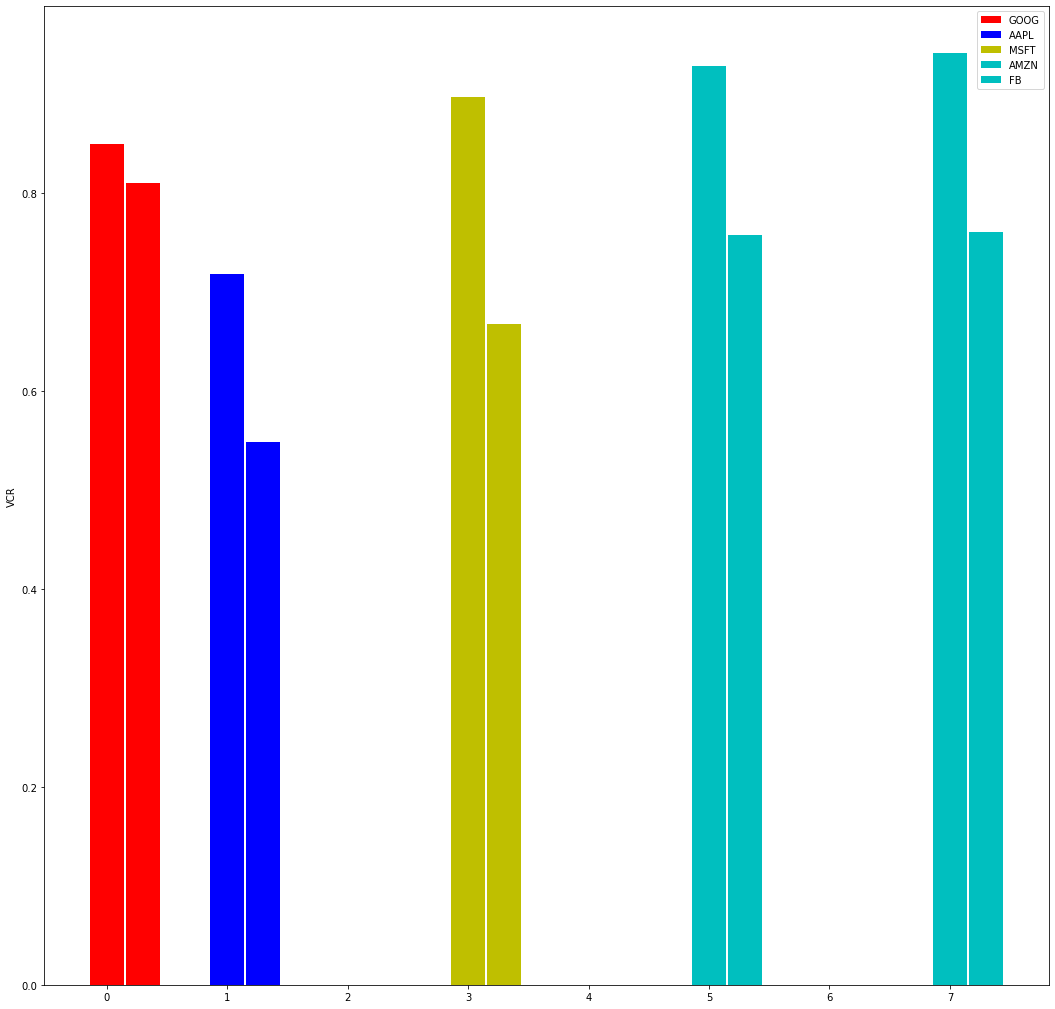

In [96]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def Plot_CVR(*argv):
    y = ["AAPL","BAC","WMT","AEO"]
    x = []
    for arg in argv:
        q = []
        ar = arg.iloc[:,2:11]
        
        scaler = MinMaxScaler()
        sc = scaler.fit_transform(ar)
        svd = TruncatedSVD(n_components=1)
        svd.fit(sc)
        vc = svd.explained_variance_ratio_.sum()
        q.append(vc)
        scaler = StandardScaler()
        sc = scaler.fit_transform(ar)
        svd = TruncatedSVD(n_components=1)
        svd.fit(sc)
        vc = svd.explained_variance_ratio_.sum()
        q.append(vc)
        #print(q)
        x.append(q)
    print(x)
    import matplotlib.pyplot as plt 
    
    fig=plt.figure(figsize=(18,18))
    bar1 = plt.bar(0, x[0][0], color= 'r',width = .28)
    bar1 = plt.bar(.3, x[0][1], color= 'r', width = .28)

    
    bar2 = plt.bar(1.0, x[1][0], color= 'b',width = .28)
    bar2 = plt.bar(1.3, x[1][1], color= 'b', width = .28)
    
    bar3 = plt.bar(3.0, x[2][0], color= 'y',width = .28)
    bar3 = plt.bar(3.3, x[2][1], color= 'y', width = .28)
    
    bar4 = plt.bar(5.0, x[3][0], color= 'c',width = .28)
    bar4 = plt.bar(5.3, x[3][1], color= 'c', width = .28)
    
    bar5 = plt.bar(7.0, x[4][0], color= 'c',width = .28)
    bar5 = plt.bar(7.3, x[4][1], color= 'c', width = .28)
    
    plt.legend( (bar1,bar2,bar3,bar4, bar5), ('GOOG', 'AAPL', 'MSFT', 'AMZN', 'FB') )
    plt.ylabel("VCR")
    plt.show()

Plot_CVR(goog, aapl, msft, amzn, fb)

In [97]:
#Data read

ticker_name='GOOG'
goog2 = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='AMZN'
amzn = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='AAPL'
aapl = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='MSFT'
msft = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='FB'
fb = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)


In [ ]:
#Data read  Please Wait for 2 mins

ticker_name='JPM'
jpm = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='BAC'
bac = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='C'
c = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='GS'
gs = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

ticker_name='HSBC'
hsbc = retrieveStock(ticker_name,'av-daily',  s_date, e_date, api_key)

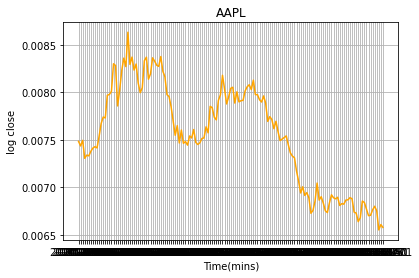

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

def plot_data(data):

  plt.plot( ( np.log ( data['close'] / (data['close'] - 1 )  ) ), c='orange')
  plt.xlabel('Time(mins)')
  plt.ylabel('log close')

  plt.title('AAPL')
  plt.grid('on')


  plt.show()

plot_data(aapl)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Log return

def plot_data(data):

  plt.plot( ( np.log ( data['close'] / (data['close'] - 1 )  ) ), c='orange')
  plt.xlabel('Time(mins)')
  plt.ylabel('log close')

  plt.title('GOOG')
  plt.grid('on')


  plt.show()

plot_data(goog)

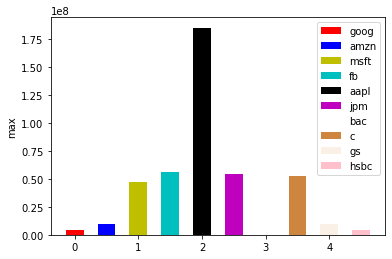

In [92]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from scipy.stats import kurtosis
from scipy.stats import skew

def Plot_CVR(*argv):
    
    x = []
    for arg in argv:
        ar = np.array(arg['volume'])
        q = np.max(ar)
        x.append(q)
        
        
    bar1 = plt.bar(0, x[0], color= 'r',width = .28)
    bar2 = plt.bar(.5, x[1], color= 'b', width = .28)

    
    bar3 = plt.bar(1.0, x[2], color= 'y',width = .28)
    bar4 = plt.bar(1.5, x[3], color= 'c', width = .28)
    
    bar5 = plt.bar(2.0, x[4], color= 'k',width = .28)
    bar6 = plt.bar(2.5, x[5], color= 'm', width = .28)
    
    bar7 = plt.bar(3.0, x[6], color= 'w',width = .28)
    
    bar8 = plt.bar(3.5, x[7], color= 'peru',width = .28)
    bar9 = plt.bar(4.0, x[8], color= 'linen',width = .28)
    bar10 = plt.bar(4.5, x[9], color= 'pink',width = .28)
    
    plt.legend( (bar1,bar2,bar3,bar4, bar5,bar6,bar7,bar8,bar9, bar10), ('goog','amzn','msft','fb','aapl','jpm','bac','c','gs','hsbc') )
    plt.ylabel("max")
    plt.show()

Plot_CVR(goog,amzn,msft,fb,aapl,jpm,bac,c,gs,hsbc)

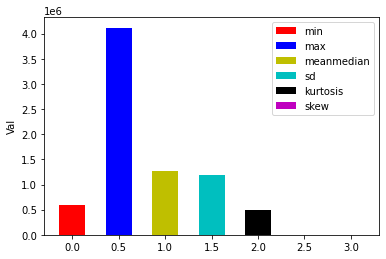

In [116]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from scipy.stats import kurtosis
from scipy.stats import skew

def Plot_CVR(arg):
    
    x = []
    ar = np.array(arg['volume'])
    
    q = np.min(ar)
    x.append(q)
    
    q = np.max(ar)
    x.append(q)
    
    q = np.mean(ar)
    x.append(q)
    
    q = np.median(ar)
    x.append(q)
    
    q = np.std(ar)
    x.append(q)
    
    q = kurtosis(ar)
    x.append(q)
    
    q = skew(ar)
    x.append(q)
        
        
    bar1 = plt.bar(0, x[0], color= 'r',width = .28)
    bar2 = plt.bar(.5, x[1], color= 'b', width = .28)

    
    bar3 = plt.bar(1.0, x[2], color= 'y',width = .28)
    bar4 = plt.bar(1.5, x[3], color= 'c', width = .28)
    
    bar5 = plt.bar(2.0, x[4], color= 'k',width = .28)
    bar6 = plt.bar(2.5, x[5], color= 'm', width = .28)
    
    bar7 = plt.bar(3.0, x[6], color= 'w',width = .28)
    
    
    plt.legend( (bar1,bar2,bar3,bar4, bar5,bar6,bar7), ('min','max','mean''median','sd','kurtosis','skew') )
    plt.ylabel("Val")
    plt.show()

Plot_CVR(goog)

In [19]:
goog.head(1)

,,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
symbol,date,,,,,,,,,,,,
GOOG,2021-02-01 00:00:00+00:00,1901.35,1922.3918,1850.93,1853.57,1602182,1901.35,1922.3918,1850.93,1853.57,1602182,0.0,1.0


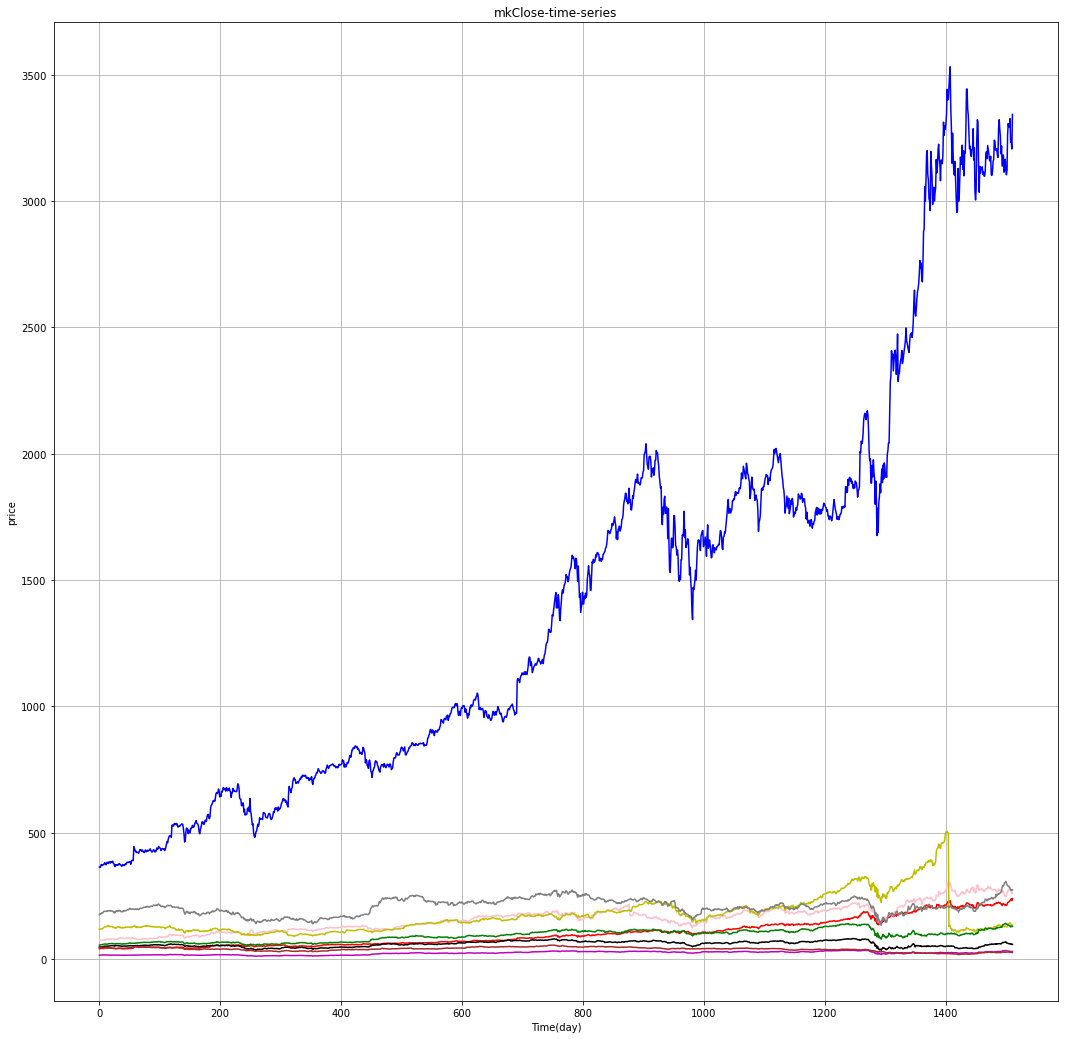

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Viz function

def plot_data(*data):
  x = ['blue','r','pink','y','g','m','k','gray','brown']
  fig=plt.figure(figsize=(18,18))
  for d in range(len(data)):
    
    plt.plot(np.array(data[d]), c=x[d])
    plt.xlabel('Time(day)')
    plt.ylabel('price')
    plt.title('mkClose-time-series')
    plt.grid('on')



  plt.show()

#Change data param for other plost

plot_data(amzn.iloc[:,3:4],msft.iloc[:,3:4],fb.iloc[:,3:4],aapl.iloc[:,3:4],
          jpm.iloc[:,3:4],bac.iloc[:,3:4],c.iloc[:,3:4],gs.iloc[:,3:4],hsbc.iloc[:,3:4])

In [30]:
hsbc.iloc[:,3:4].head(2)

,close
2015-02-03,46.85
2015-02-04,46.70


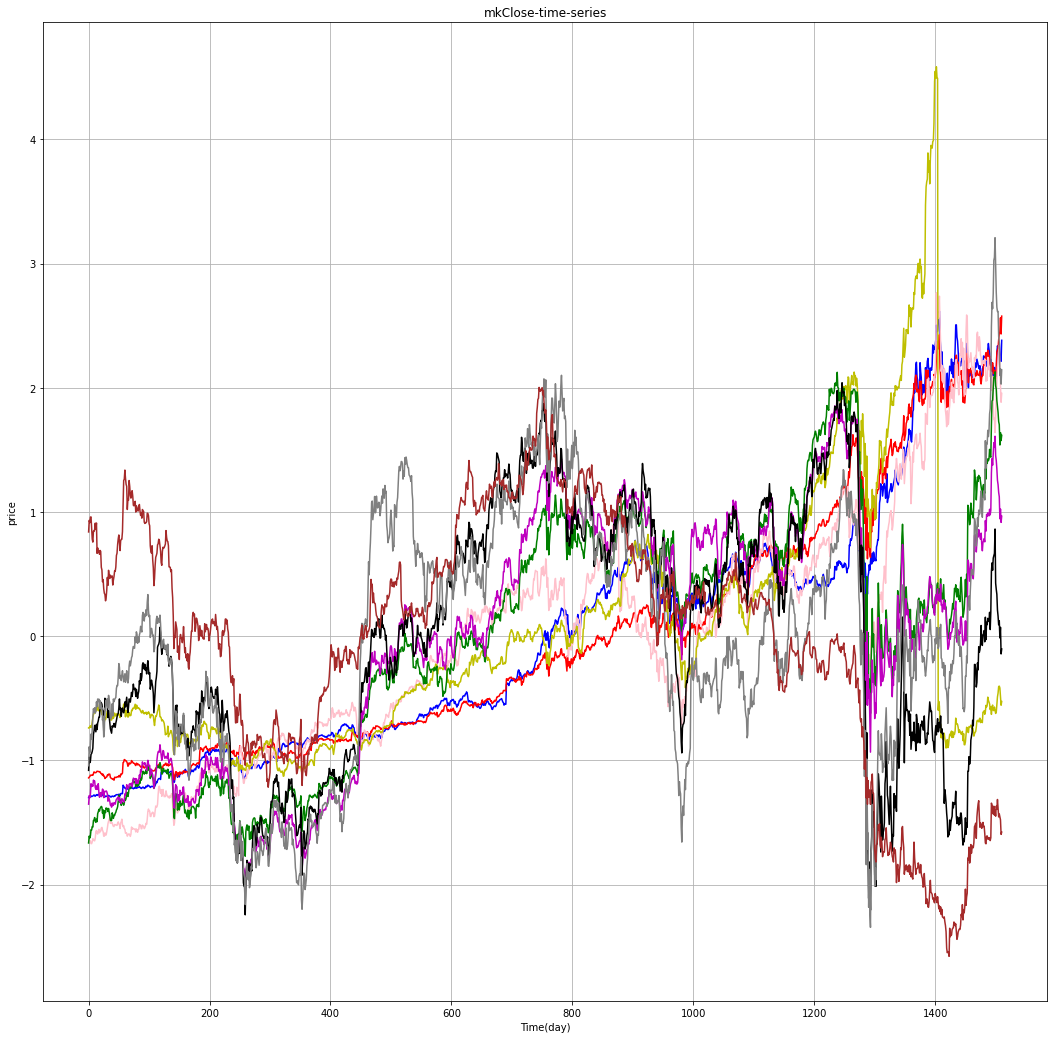

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

#Viz function

def plot_data(*data):
  x = ['blue','r','pink','y','g','m','k','gray','brown']
  fig=plt.figure(figsize=(18,18))
  for d in range(len(data)):
    
    ar = np.array(data[d])
        
    scaler = StandardScaler()
    sc = scaler.fit_transform(ar)
    
    plt.plot(sc, c=x[d])
    plt.xlabel('Time(day)')
    plt.ylabel('price')
    plt.title('mkClose-time-series')
    plt.grid('on')



  plt.show()

#Change data param for other plost

plot_data(amzn.iloc[:,3:4],msft.iloc[:,3:4],fb.iloc[:,3:4],aapl.iloc[:,3:4],
          jpm.iloc[:,3:4],bac.iloc[:,3:4],c.iloc[:,3:4],gs.iloc[:,3:4],hsbc.iloc[:,3:4])

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Viz function

def plot_data(*data):
    x = ['goog','amzn','msft','fb','aapl','jpm','bac','c','gs','hsbc']
    m = []
    for d in range(len(data)):
        close = np.array(data[d].iloc[:,0:1].astype('float'))
        open = np.array(data[d].iloc[:,3:4].astype('float'))
        s = 0
        for i in range(len(open)):
            if(close[i]>open[i]):
                s = s + 1
                
        m.append(s)
        s = 0
    
    for i in range(len(x)): 
        
        print(x[i],m[i])
            
        
        

plot_data(goog,amzn,msft,fb,aapl,jpm,bac,c,gs,hsbc)


goog 88
amzn 753
msft 696
fb 730
aapl 696
jpm 723
bac 736
c 723
gs 754
hsbc 742


In [80]:
len(amzn)

1511